In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from sklearn.tree import DecisionTreeClassifier
#lgbmClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *


In [2]:
# importar o dataset para o pandas HR_Employee_Attrition_Dataset.csv entre ;
df = pd.read_csv('HR_Employee_Attrition_Dataset.csv', sep=';')
#retirar a coluna EmployeeNumber , over18, standardhours porque são irrelevantes, ou sempre iguais(over18 sempre sim, e standardhours=80)
df = df.drop(['EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

In [3]:
#verificar as primeiras 5 linhas
print(df.head(5))

  Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...               

In [4]:
#valores em falta
print(df.isnull().sum())

Attrition                   0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [5]:
# 4. Display a Sample Data Table
sample_data = df.head(2)  # Gets the first 10 rows of the dataset
print(sample_data)
# Apply styling
# Apply basic styling to improve readability
# Apply basic styling to improve readability
styled_sample_data = sample_data.style.set_table_styles(
    [{
        'selector': 'th',
        'props': [('background-color', '#f4f4f4'), ('color', 'black')]
    },
    {
        'selector': 'td',
        'props': [('background-color', '#fafafa')]
    }]
).set_properties(**{'border': '1.5px solid black', 'text-align': 'left'})

# Display the styled DataFrame
styled_sample_data

  Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   

   Gender  ...  PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0  Female  ...                  3                         1                 0   
1    Male  ...                  4                         4                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0    

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,No,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7


In [6]:
#verificar o tipo de dados
print(df.dtypes)

Attrition                   object
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [7]:
#verificar a dimensão do dataset
print(df.shape)

(2940, 31)


In [8]:
# ver a descrição do dataset
print(df.describe())

               Age    DailyRate  DistanceFromHome    Education  \
count  2940.000000  2940.000000       2940.000000  2940.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.133819   403.440447          8.105485     1.023991   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              2940.000000  2940.000000     2940.000000  2940.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.092896    20.325969        0.711440     1.106752   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.0

In [9]:
#verificar a distribuição do target em %
print(df['Attrition'].value_counts())

Attrition
No     2466
Yes     474
Name: count, dtype: int64


In [10]:


# 4. Display a Sample Data Table
sample_data = df.head(10)  # Gets the first 10 rows of the dataset
print(sample_data)

  Attrition  Age     BusinessTravel  DailyRate              Department  \
0       Yes   41      Travel_Rarely       1102                   Sales   
1        No   49  Travel_Frequently        279  Research & Development   
2       Yes   37      Travel_Rarely       1373  Research & Development   
3        No   33  Travel_Frequently       1392  Research & Development   
4        No   27      Travel_Rarely        591  Research & Development   
5        No   32  Travel_Frequently       1005  Research & Development   
6        No   59      Travel_Rarely       1324  Research & Development   
7        No   30      Travel_Rarely       1358  Research & Development   
8        No   38  Travel_Frequently        216  Research & Development   
9        No   36      Travel_Rarely       1299  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life 

In [11]:
#definir uma função para construir gráficos para comparar colunas com a variável target(atrittion)
def pie_bar_plot(df, col, hue):
    plt.figure(figsize=(14, 6))
    
    # extrair valores das colunas
    value_counts = df[col].value_counts().sort_index()
    
    # First subplot: Pie chart
    plt.subplot(1, 2, 1) 
    ax1 = value_counts
    plt.title(f"Distribution by {col}", fontweight="black", size=14, pad=15)
    colors = sns.color_palette('Set2', len(ax1))
    plt.pie(ax1.values, labels=ax1.index, autopct="%.1f%%", pctdistance=0.75, startangle=90, 
            colors=colors, textprops={"size":14})
    center_circle = plt.Circle((0, 0), 0.4, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    
    # Second subplot: Bar plot
    plt.subplot(1, 2, 2)
    new_df = df[df[hue] == 'Yes']
    value_1 = value_counts
    value_2 = new_df[col].value_counts().sort_index()  # Sort the values in the same order
    ax2 = np.floor((value_2 / value_1) * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')
    plt.title(f"Attrition Rate by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2):
        plt.text(index, value, str(value) + " (" + str(ax2[index]) + "% )", ha="center", va="bottom", size=10)

    plt.tight_layout()
    plt.show()

C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


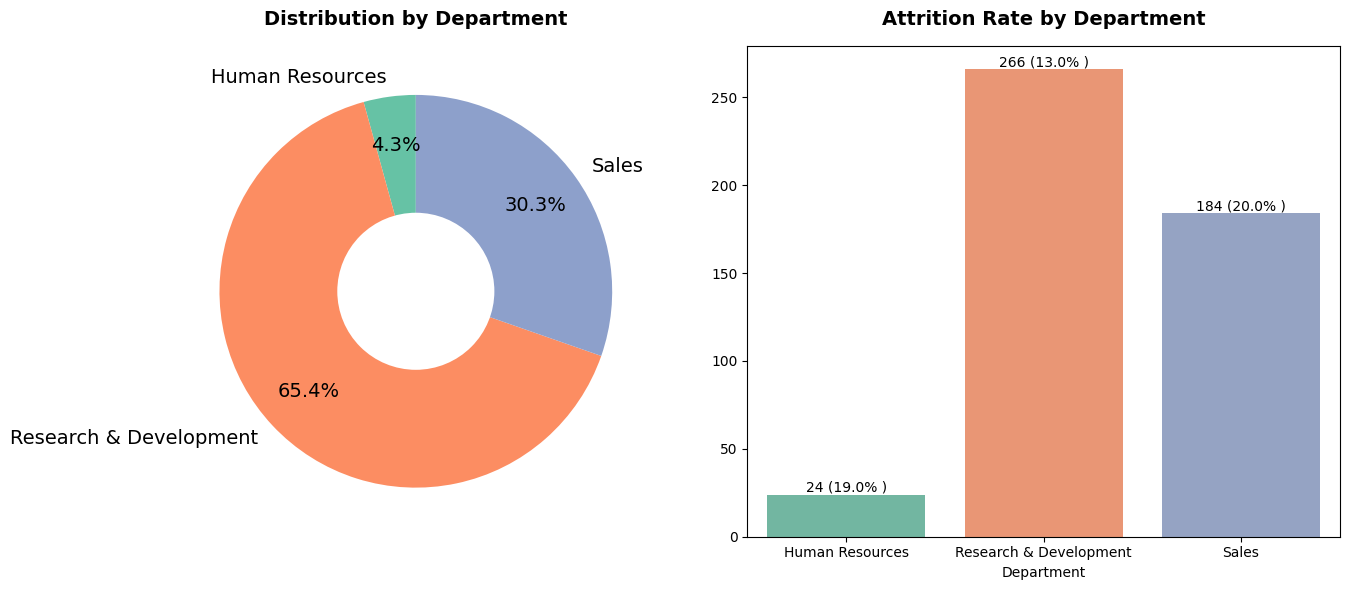

In [12]:
pie_bar_plot(df, 'Department', 'Attrition')
#A maioria dos funcionários é do Departamento de Pesquisa e Desenvolvimento (65,4%).
#A maior taxa de rotatividade ocorre no Departamento de Vendas.
#A taxa de rotatividade no Departamento de Recursos Humanos também é muito alta.
#A rotatividade no Departamento de Pesquisa e Desenvolvimento é a menor em comparação com os outros departamentos.


C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


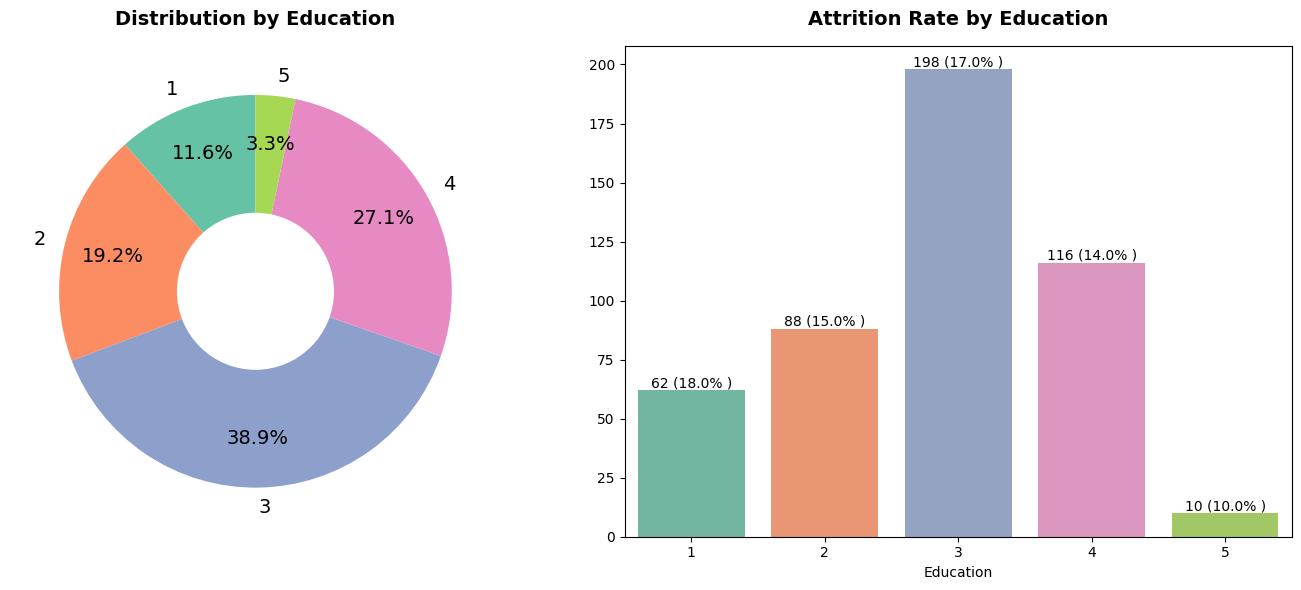

In [13]:
pie_bar_plot(df, 'Education', 'Attrition')

C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


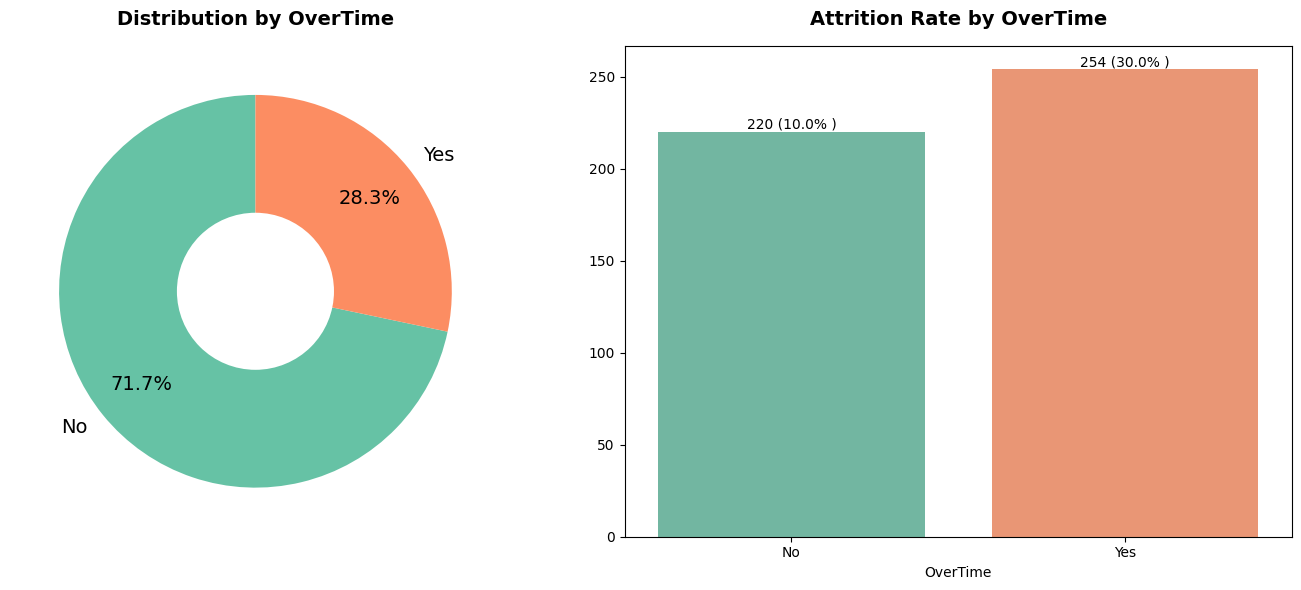

In [14]:
pie_bar_plot(df, 'OverTime', 'Attrition')
#Mais de 60% dos funcionários têm um bom equilíbrio entre trabalho e vida pessoal.
#Os funcionários com um mau equilíbrio entre trabalho e vida pessoal têm uma taxa de rotatividade muito alta.   

C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


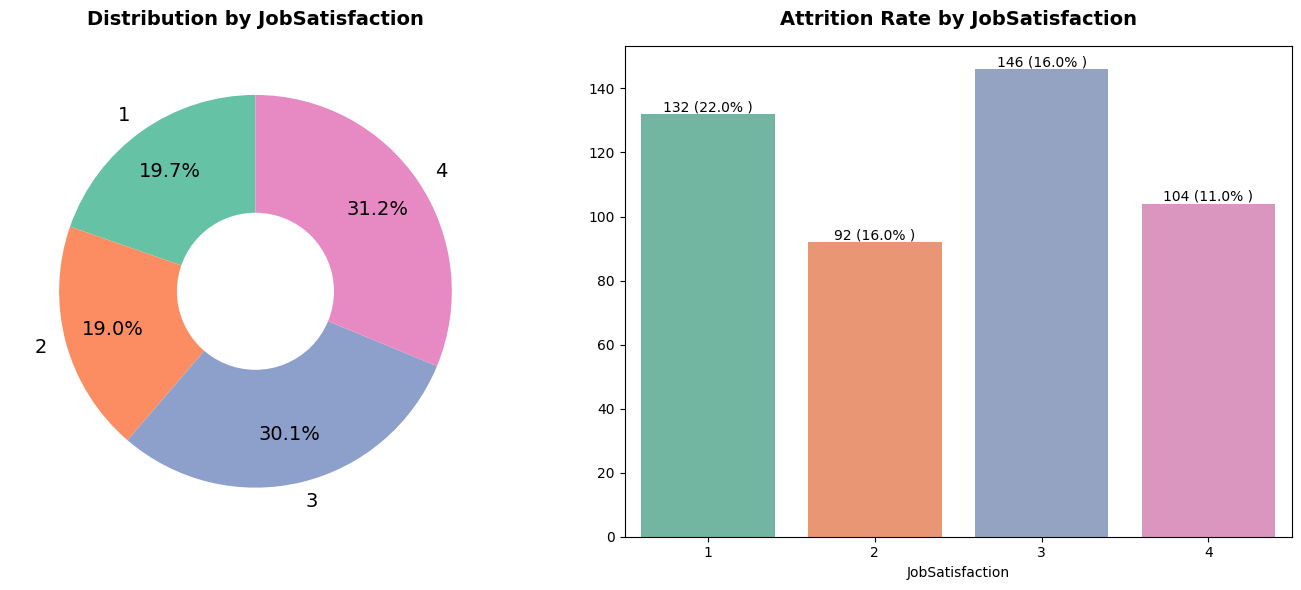

In [15]:
pie_bar_plot(df, 'JobSatisfaction', 'Attrition')

C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


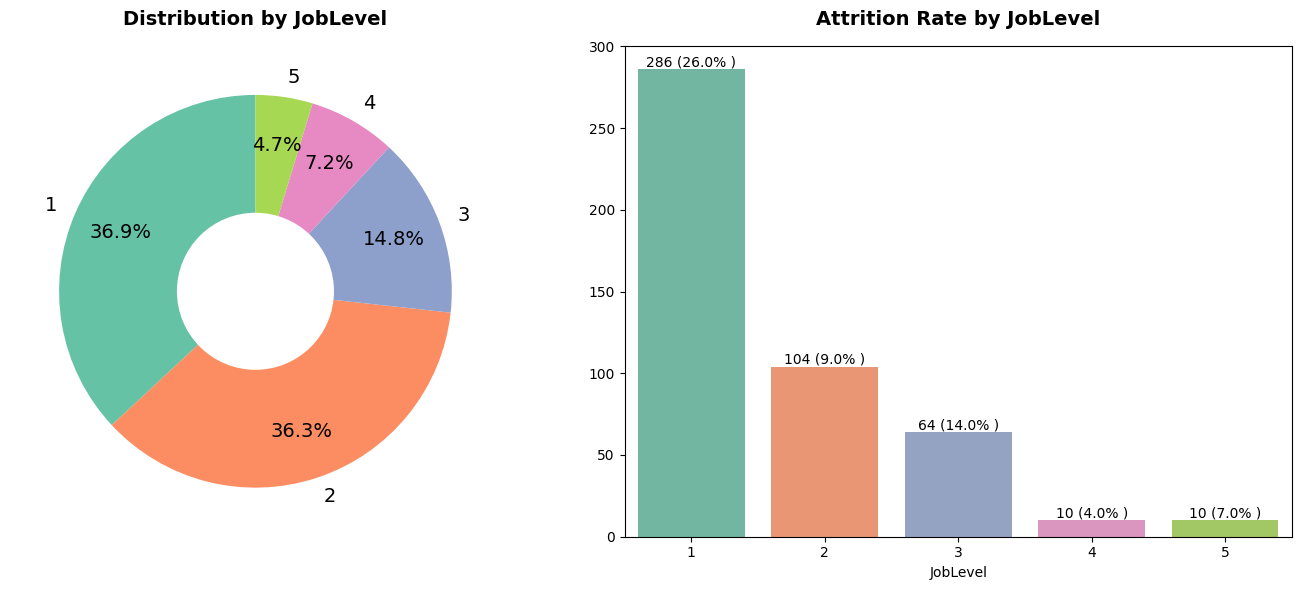

In [16]:
pie_bar_plot(df, 'JobLevel', 'Attrition')

C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\1813201332.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_2.index, y=value_2.values, palette='Set2')


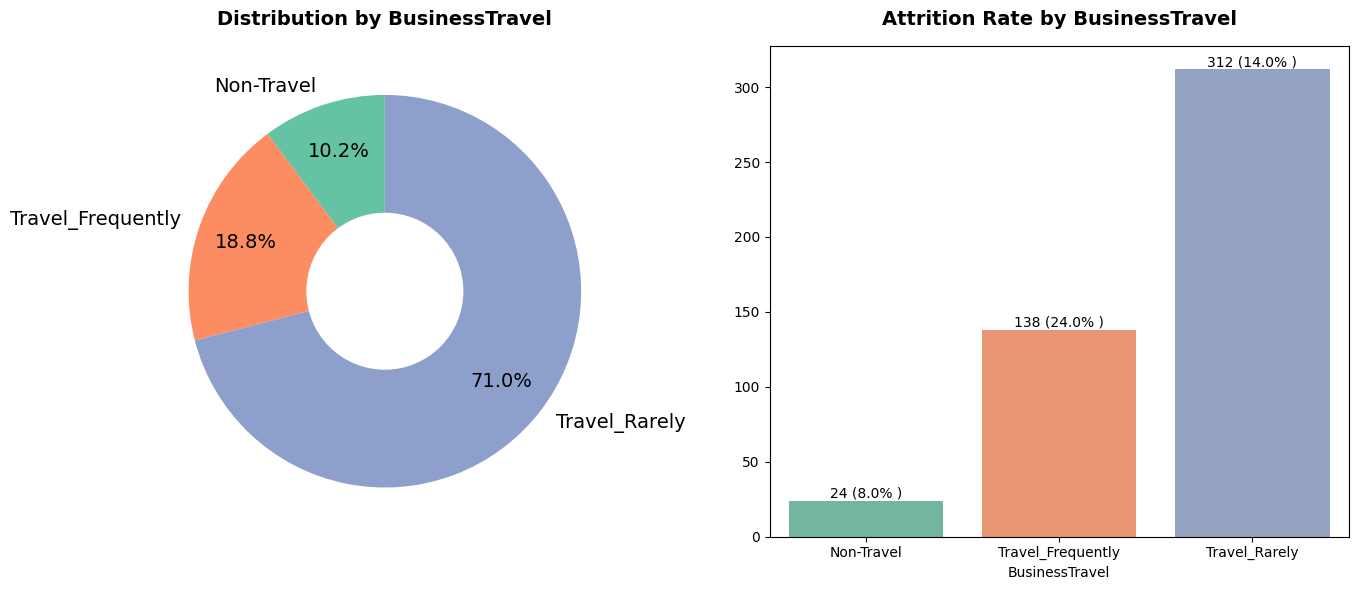

In [17]:
pie_bar_plot(df, 'BusinessTravel', 'Attrition')

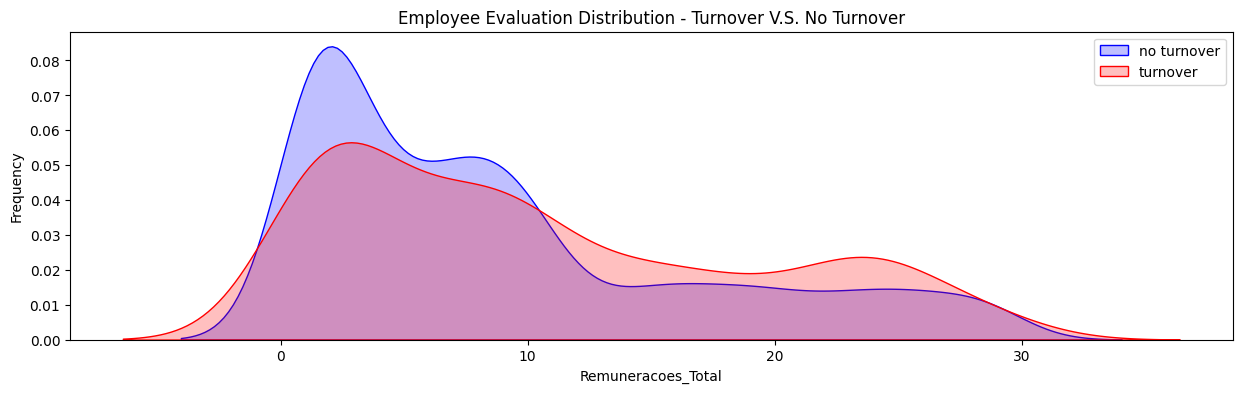

In [18]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'DistanceFromHome'] , color='b',fill=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'DistanceFromHome'] , color='r',fill=True, label='turnover')
ax.set(xlabel='Remuneracoes_Total', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')
plt.legend()

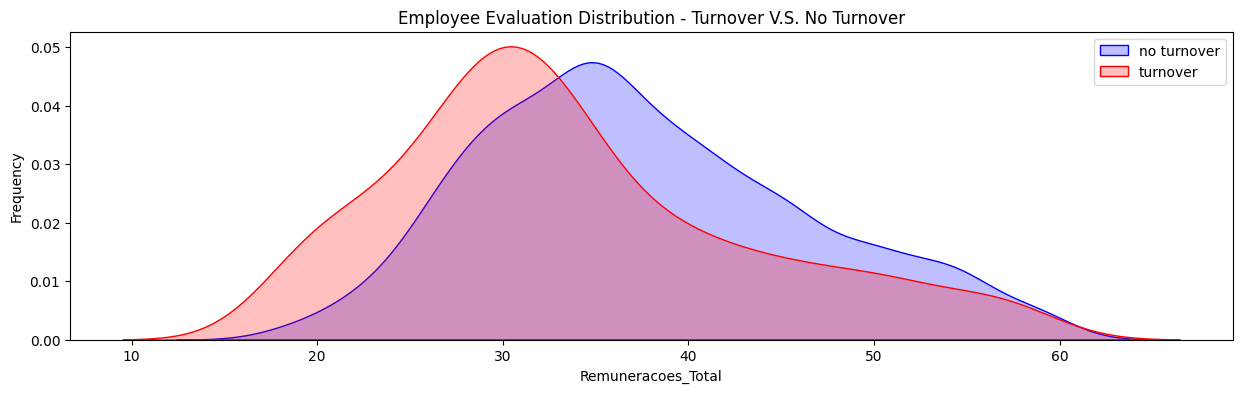

In [19]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'No'),'Age'] , color='b',fill=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['Attrition'] == 'Yes'),'Age'] , color='r',fill=True, label='turnover')
ax.set(xlabel='Remuneracoes_Total', ylabel='Frequency')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')
plt.legend()

In [20]:
df["EnvironmentSatisfaction"] = df["EnvironmentSatisfaction"].replace({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
df["JobInvolvement"] = df["JobInvolvement"].replace({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
df["JobSatisfaction"] = df["JobSatisfaction"].replace({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
df["PerformanceRating"] = df["PerformanceRating"].replace({"Low": 0, "Good": 1, "Excellent": 2, "Outstanding": 3})
df["RelationshipSatisfaction"] = df["RelationshipSatisfaction"].replace({"Low": 0, "Medium": 1, "High": 2, "Very High": 3})
df["WorkLifeBalance"] = df["WorkLifeBalance"].replace({"Bad": 0, "Good": 1, "Better": 2, "Best": 3})
df["Education"] = df["Education"].replace({"Below College": 0, "College": 1, "Bachelor": 2, "Master": 3, "Doctor": 4})
df["JobLevel"] = df["JobLevel"].replace({"Entry Level": 0, "Junior Level": 1, "Mid Level": 2,
                                         "Senior Level": 3, "Executive Level": 4})
df["Gender"] = df["Gender"].replace({"Female": 0, "Male": 1})
df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})


C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\673448320.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({"Female": 0, "Male": 1})
C:\Users\Tomás\AppData\Local\Temp\ipykernel_23152\673448320.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Attrition"] = df["Attrition"].replace({"No": 0, "Yes": 1})


In [21]:
new_data = df.copy()
new_data["Attrition"] = new_data["Attrition"].replace({"No":0,"Yes":1})

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 2940 non-null   int64 
 1   Age                       2940 non-null   int64 
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EnvironmentSatisfaction   2940 non-null   int64 
 9   Gender                    2940 non-null   int64 
 10  HourlyRate                2940 non-null   int64 
 11  JobInvolvement            2940 non-null   int64 
 12  JobLevel                  2940 non-null   int64 
 13  JobRole                   2940 non-null   object
 14  JobSatisfaction         

In [23]:
#Transformar variáveis categóricas em numéricas
dummy_col = [column for column in df.columns if df[column].dtype == 'object']
df = pd.get_dummies(df, columns=dummy_col, drop_first=True, dtype='uint8')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          2940 non-null   int64
 1   Age                                2940 non-null   int64
 2   DailyRate                          2940 non-null   int64
 3   DistanceFromHome                   2940 non-null   int64
 4   Education                          2940 non-null   int64
 5   EnvironmentSatisfaction            2940 non-null   int64
 6   Gender                             2940 non-null   int64
 7   HourlyRate                         2940 non-null   int64
 8   JobInvolvement                     2940 non-null   int64
 9   JobLevel                           2940 non-null   int64
 10  JobSatisfaction                    2940 non-null   int64
 11  MonthlyIncome                      2940 non-null   int64
 12  MonthlyRate         

,Attrition,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,41,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,0,49,279,8,1,3,1,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,1,37,1373,2,2,4,1,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,0,33,1392,3,4,4,0,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,0,27,591,2,1,1,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,0,36,884,23,2,3,1,41,4,2,...,1,0,0,0,0,0,0,1,0,0
2936,0,39,613,6,1,4,1,42,2,3,...,0,0,0,0,0,0,0,1,0,0
2937,0,27,155,4,3,2,1,87,4,2,...,0,0,1,0,0,0,0,1,0,1
2938,0,49,1023,2,3,4,1,63,2,2,...,0,0,0,0,0,1,0,1,0,0


In [24]:
# Dividir o dataset em target(y) e features(x)
X = df.drop(['Attrition'], axis=1)
y = df[['Attrition']]

In [25]:
#normalizar os dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [26]:
from sklearn.model_selection import train_test_split
all_indices= X.index
# Randomly select indices for the test set (replace with your strategy)
test_indices = X.sample(frac=0.25, random_state=42).index
#dividir em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)



In [27]:
from sklearn.tree import DecisionTreeClassifier
#lgbmClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from scipy.stats import uniform
from sklearn import metrics
from sklearn.metrics import *

In [28]:
from sklearn.model_selection import cross_val_score
resultados_modelo={}
def model_prediction(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    training_accuracy = []
    testing_accuracy = []
    precision = []
    recall = []
    auc_score = []
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean cross-validation score:", cv_scores.mean())
    X_train_pred = model.predict(X_train)
    X_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1]
    a = accuracy_score(y_train,X_train_pred)*100
    f= recall_score(y_train,X_train_pred)*100
    b = accuracy_score(y_test,X_test_pred)*100
    c = precision_score(y_test,X_test_pred)
    d = recall_score(y_test,X_test_pred)
    e = roc_auc_score(y_test, y_test_prob)
    f1 = f1_score(y_test,X_test_pred)
    training_accuracy.append(a)
    testing_accuracy.append(b)
    precision.append(c)
    recall.append(d)
    auc_score.append(e)




    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",c)
    print(f"Recall Score of {model} model on training data is:",f)
    print(f"Recall Score of {model} model on testing data is:",d)
    print(f"AUC Score of {model} model is:", e)
    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test, model.predict(X_test)))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test,X_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()
    print("\n------------------------------------------------------------------------")
    print(f"ROC - AUC Curve of {model} model is:")
    y_pred_proba = model.predict_proba(X_test)[:][:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    metrics = {
        'Accuracy_Train': a,
        'Recall_Train': f,
        'Accuracy_Test': b,
        'Precision_Test': c,
        'Recall_Test': d,
        'F1-Score': f1,
        'AUC_Test': e

    }
    

    plt.figure(figsize=(8, 4))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}",color="green")
    plt.plot([0, 1], [0, 1], linestyle="--", color="black")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve",pad=20,fontweight="black")
    plt.legend()
    plt.show()
    return metrics

In [29]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o classificador de árvore de decisão
dt_classifier = DecisionTreeClassifier()

# Configurar a busca em grade com validação cruzada de 5 vezes
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Executar a busca em grade no conjunto de treinamento
grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


Cross-validation scores: [0.92970522 0.92517007 0.92063492 0.92517007 0.92743764]
Mean cross-validation score: 0.92562358276644
Accuracy_Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on Testing Data is: 95.10204081632652

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model is: 0.8738738738738738
Recall Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on training data is: 100.0
Recall Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on testing data is: 0.8151260504201681
AUC Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model is: 0.8961993888464477

------------------------------------------------------------------------
Classification Report of DecisionTreeClassifi

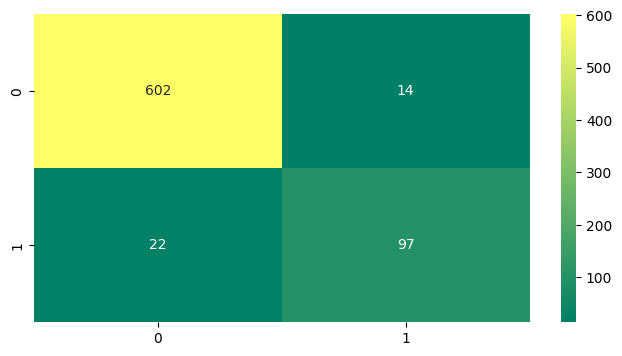


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier(criterion='entropy', random_state=42) model is:


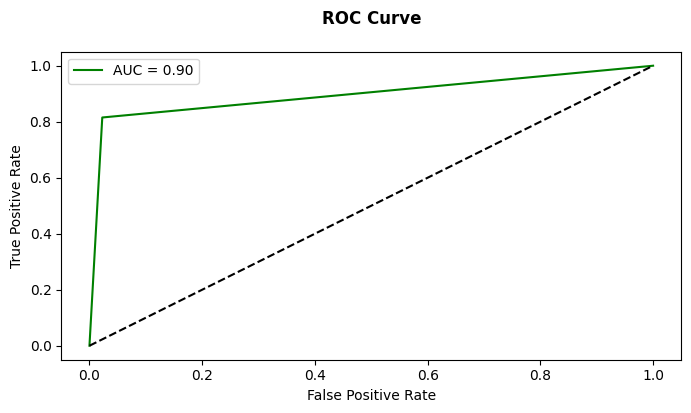

In [30]:
# Random Forest Classifier
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()
c=DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_leaf=1, min_samples_split=2,random_state=42)
resultados_modelo['DecisionTree(without SMOTE)']=model_prediction(c,X_train,X_test,y_train,y_test)



In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Criar o classificador RandomForest
#rf_classifier = RandomForestClassifier()

# Configurar a busca em grade com validação cruzada de 5 vezes
#grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Executar a busca em grade no conjunto de treinamento
#grid_search.fit(X_train, y_train)

# Obter os melhores parâmetros e o melhor score
#best_params = grid_search.best_params_
#print(best_params)
#{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [32]:
from sklearn.feature_selection import SelectKBest, f_classif
# Selecionar as melhores características usando ANOVA F-Value
k= 26# Número de características a serem selecionadas(selecionar 44 se quiser todas e não eliminar nenhuma)
selector = SelectKBest(score_func=f_classif,k=k)
X_selected = selector.fit_transform(X_train, y_train)
# Obtendo os nomes das características selecionadas e adicionando à lista selected_features
selected_indices = selector.get_support(indices=True)
selected_features = list(X.columns[selected_indices])
X_train_selected = X_train[:, selected_indices]
X_test_selected = X_test[:, selected_indices]
X_selected=X_scaled[:,selected_indices]
print(selected_features)




['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'Department_Research & Development', 'Department_Sales', 'EducationField_Marketing', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Sales Representative', 'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_Yes']


Cross-validation scores: [0.95011338 0.95918367 0.94557823 0.94331066 0.93877551]
Mean cross-validation score: 0.9473922902494332
Accuracy_Score of RandomForestClassifier(random_state=42) model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier(random_state=42) model on Testing Data is: 95.64625850340136

------------------------------------------------------------------------
Precision Score of RandomForestClassifier(random_state=42) model is: 0.978021978021978
Recall Score of RandomForestClassifier(random_state=42) model on training data is: 100.0
Recall Score of RandomForestClassifier(random_state=42) model on testing data is: 0.7478991596638656
AUC Score of RandomForestClassifier(random_state=42) model is: 0.9853896103896104

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(random_state=42) model is:
              precision    recall  f1-score   support

           0       0.95      1.00      0

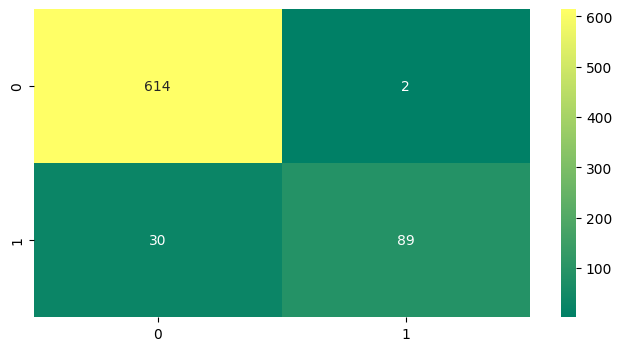


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier(random_state=42) model is:


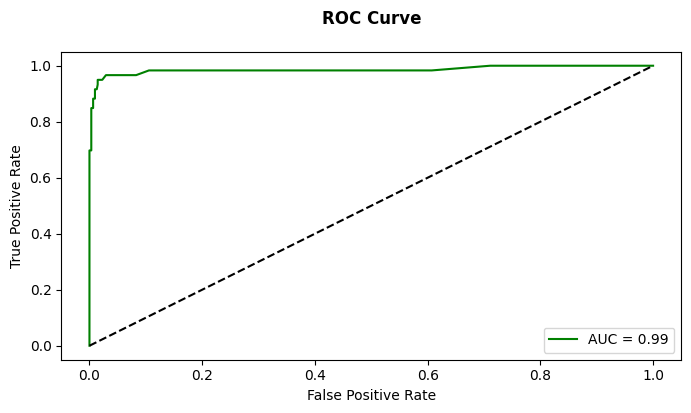

In [33]:
c=RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf=1, min_samples_split=2,n_estimators=100,random_state=42)
resultados_modelo['RandomForest(without SMOTE)']=model_prediction(c,X_train_selected,X_test_selected,y_train,y_test)

<function accuracy_score at 0x000001CF7CBF2CB0>
Cross-validation scores: [0.94104308 0.95238095 0.94557823 0.93650794 0.93650794]
Mean cross-validation score: 0.9424036281179138
Accuracy_Score of XGBClassifier(alpha=0.2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifie

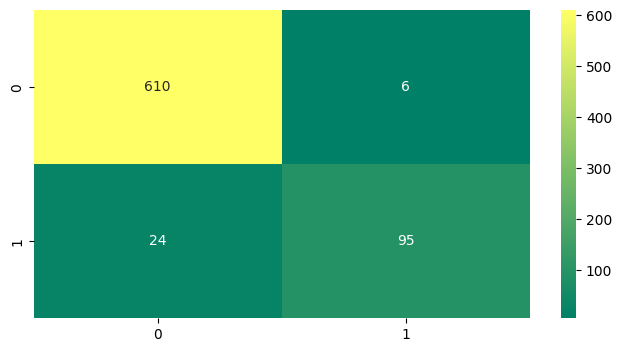


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(alpha=0.2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...) model is:


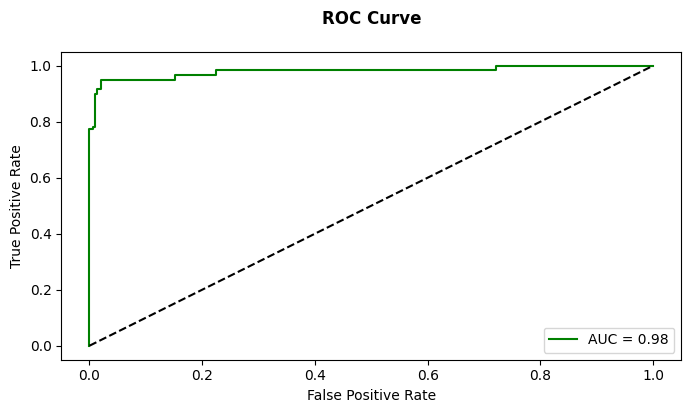

[0.02677745 0.02815596 0.03457623 0.03702511 0.05512468 0.03334117
 0.03512501 0.04818757 0.03125726 0.02581092 0.0319146  0.0388218
 0.02785344 0.02578092 0.03900821 0.02602285 0.04871041 0.02838746
 0.02706726 0.03155453 0.0932577  0.01371556 0.02024785 0.02060399
 0.05947807 0.11219407]


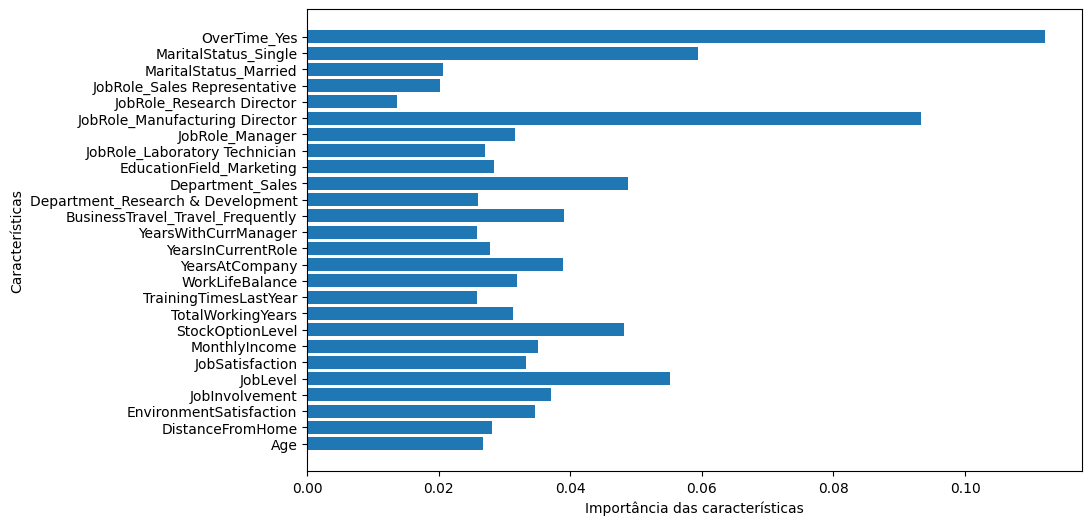

In [34]:
#importar XGBClassifier
from xgboost import XGBClassifier
print(accuracy_score)
b=XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42)
resultados_modelo['XGBClassifier (without SMOTE)'] = model_prediction(b, X_train_selected, X_test_selected, y_train, y_test)
importances = b.feature_importances_
print(importances)
import matplotlib.pyplot as plt
# obter probabilidade individual para cada colaborador


# Visualizar importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), selected_features)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.show()

In [35]:
#importar SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy='minority', k_neighbors=5)
X_smote, y_smote = sm.fit_resample(X_selected, y)
#transformar para pandas dataframe
X_selected = pd.DataFrame(X_selected, columns=selected_features)
X_smote = pd.DataFrame(X_smote, columns=X_selected.columns)
test_indices = X_smote.sample(frac=0.25, random_state=42).index



#dividir dados em treino e teste
test_indices = X_smote.sample(frac=0.25, random_state=42).index

X_train_smote, X_test_smote, y_train_smote1, y_test_smote1 = train_test_split(X_smote, y_smote, test_size=0.25, random_state=42)
y_train_smote=pd.DataFrame(y_train_smote1)
y_test_smote=pd.DataFrame(y_test_smote1)
y_train_smote = y_train_smote.values.ravel()
y_test_smote = y_test_smote.values.ravel()


In [36]:
#selecionar as melhores características usando Recursive Feature Elimination (RFE)
#from sklearn.feature_selection import RFE
#from xgboost import XGBClassifier
#model=XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42)
#model.fit(X_train_smote,y_train_smote)
#selector = RFE(model, n_features_to_select=25, step=1)
#selector = selector.fit(X_smote, y_smote)
#print selected features
#selected_indices = selector.get_support(indices=True)
#selected_features = list(X.columns[selected_indices])
#X_reduced = X_smote[selected_features]
#print(len(selected_features))
#X_train_selected1, X_test_selected1, y_train_smote1, y_test_smote1 = train_test_split(X_reduced, y_smote, test_size=0.2, random_state=42)

#model_prediction(XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42),X_train_selected1,X_test_selected1,y_train_smote1,y_test_smote1)

Cross-validation scores: [0.93783784 0.95       0.94459459 0.93648649 0.95128552]
Mean cross-validation score: 0.9440408879786417
Accuracy_Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on Testing Data is: 95.37712895377129

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model is: 0.9385113268608414
Recall Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on training data is: 100.0
Recall Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model on testing data is: 0.9682804674457429
AUC Score of DecisionTreeClassifier(criterion='entropy', random_state=42) model is: 0.9541717794641964

------------------------------------------------------------------------
Classification Report of DecisionTreeClassi

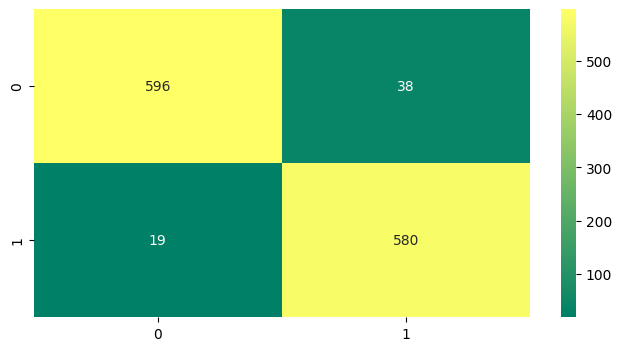


------------------------------------------------------------------------
ROC - AUC Curve of DecisionTreeClassifier(criterion='entropy', random_state=42) model is:


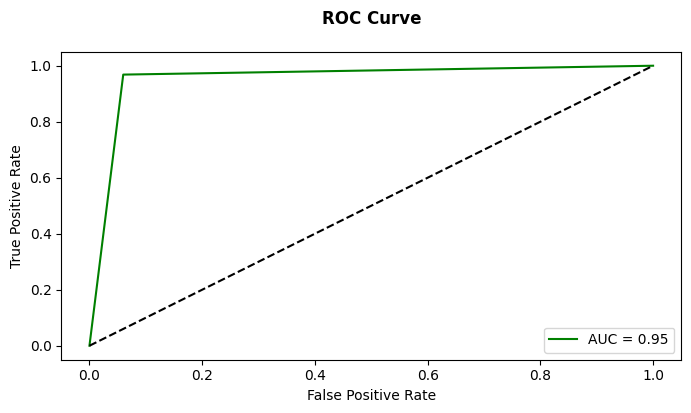

In [37]:
#modelo DecisionTree com as variáveis selecionadas e com SMOTE
a = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_leaf=1, min_samples_split=2,random_state=42)
a.fit(X_train_smote, y_train_smote)
resultados_modelo['DecisionTree(with SMOTE)'] = model_prediction(a, X_train_smote, X_test_smote, y_train_smote, y_test_smote)

Cross-validation scores: [0.97837838 0.99324324 0.97432432 0.97702703 0.97564276]
Mean cross-validation score: 0.9797231466920235
Accuracy_Score of RandomForestClassifier(random_state=42) model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier(random_state=42) model on Testing Data is: 99.43227899432279

------------------------------------------------------------------------
Precision Score of RandomForestClassifier(random_state=42) model is: 0.9933333333333333
Recall Score of RandomForestClassifier(random_state=42) model on training data is: 100.0
Recall Score of RandomForestClassifier(random_state=42) model on testing data is: 0.994991652754591
AUC Score of RandomForestClassifier(random_state=42) model is: 0.9994259623031024

------------------------------------------------------------------------
Classification Report of RandomForestClassifier(random_state=42) model is:
              precision    recall  f1-score   support

           0       1.00      0.99      0

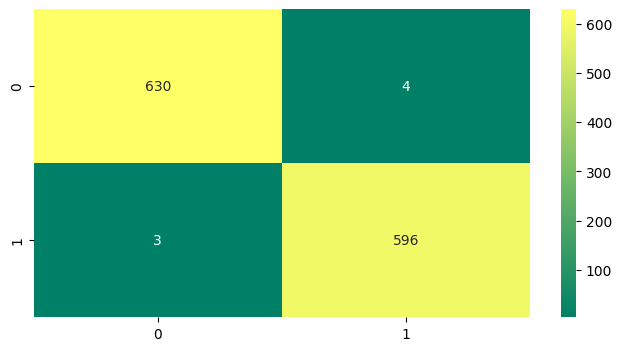


------------------------------------------------------------------------
ROC - AUC Curve of RandomForestClassifier(random_state=42) model is:


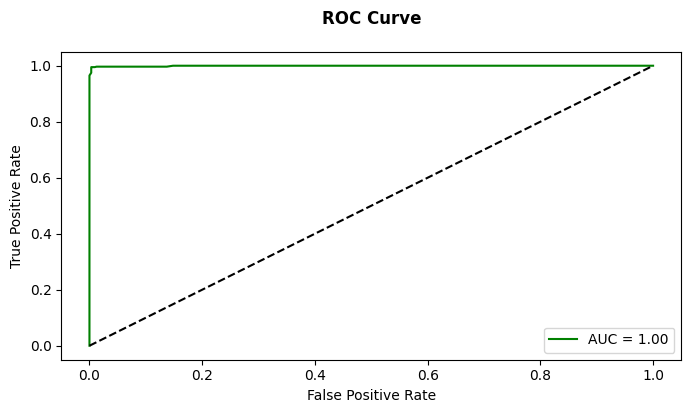

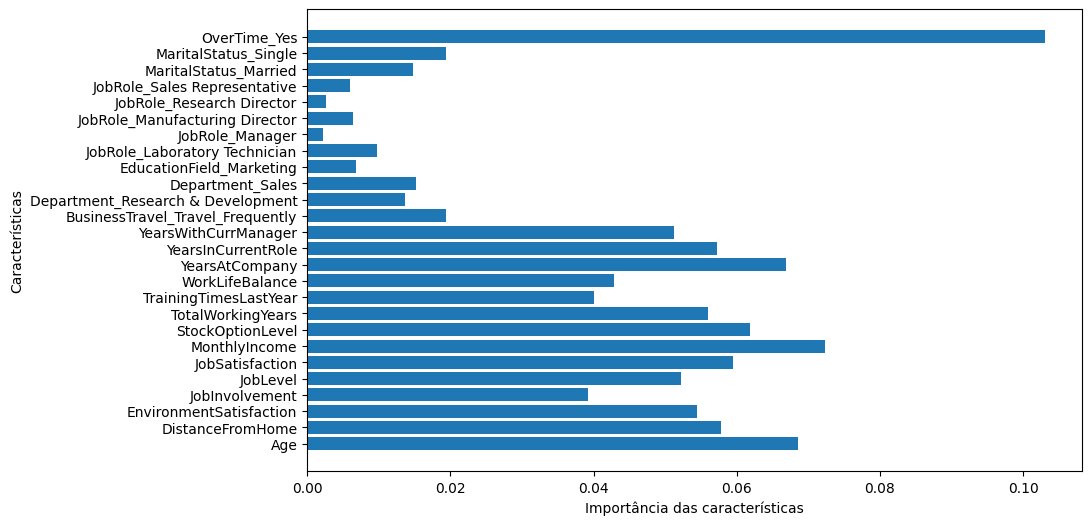

In [38]:
#modelo random forest com as variáveis selecionadas e com SMOTE
a = RandomForestClassifier(criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42)
a.fit(X_train_smote, y_train_smote)
resultados_modelo['RandomForest(with SMOTE)'] = model_prediction(a, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
importances = a.feature_importances_
import matplotlib.pyplot as plt

y_test_pred = a.predict(X_test_smote)
y_test_prob = a.predict_proba(X_test_smote)[:, 1]
y_test_prob = np.round(y_test_prob, 2)





plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), X_train_smote.columns)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.show()

In [39]:
#transformar em pandas data frame test_indices
test_indices = pd.DataFrame(test_indices, columns=['index'])
#transformar y_test_pred em pandas
y_test_pred = pd.DataFrame(y_test_pred)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_smote=pd.DataFrame(y_test_smote)


y_test_pred.index= test_indices['index'].values+1
y_test_prob.index= test_indices['index'].values+1
y_test_smote.index = test_indices['index'].values+1

mask_pred = y_test_pred.index.isin(all_indices.values)
mask_prob = y_test_prob.index.isin(all_indices.values)
mask_smote = y_test_smote.index.isin(all_indices.values)

# Use a máscara para filtrar y_test_pred, y_test_prob e y_test_smote
filtered_y_test_pred = y_test_pred[mask_pred]
filtered_y_test_prob = y_test_prob[mask_prob]
filtered_y_test_smote = y_test_smote[mask_smote]


# Crie o DataFrame
dados_rfc = pd.DataFrame({
    'Colaborador': filtered_y_test_pred.index,
    'Valor Real': filtered_y_test_smote.values.ravel(),
    'Valor Previsto': filtered_y_test_pred.values.ravel(),
    'Probabilidade': filtered_y_test_prob.values.ravel()
})
# Defina a coluna 'Colaborador' como o novo índice
dados_rfc.set_index('Colaborador', inplace=True)


In [40]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_lambda': [0.1, 0.5, 1.0],
    'alpha': [0, 0.1, 0.2]
}

# Definindo o modelo e o método de busca
#model = XGBClassifier()
#rs_cv = RandomizedSearchCV(model, param_grid, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Ajustando o modelo com os dados
#rs_cv.fit(X_train_smote, y_train_smote)

# Imprimindo os melhores parâmetros
#print('Melhores parâmetros:', rs_cv.best_params_)

Cross-validation scores: [0.98378378 0.98378378 0.97297297 0.98243243 0.97834912]
Mean cross-validation score: 0.9802644186811982
Accuracy_Score of XGBClassifier(alpha=0.2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(alpha=0.2, base_score=None, booster=None, call

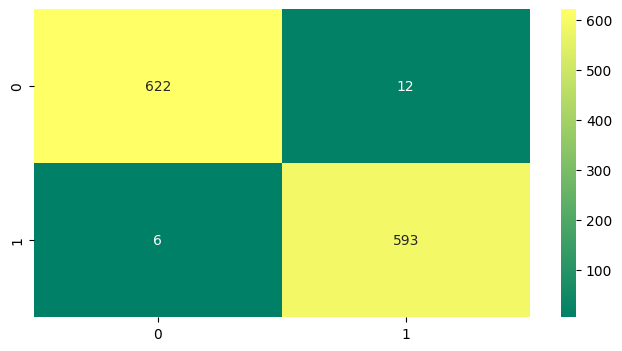


------------------------------------------------------------------------
ROC - AUC Curve of XGBClassifier(alpha=0.2, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...) model is:


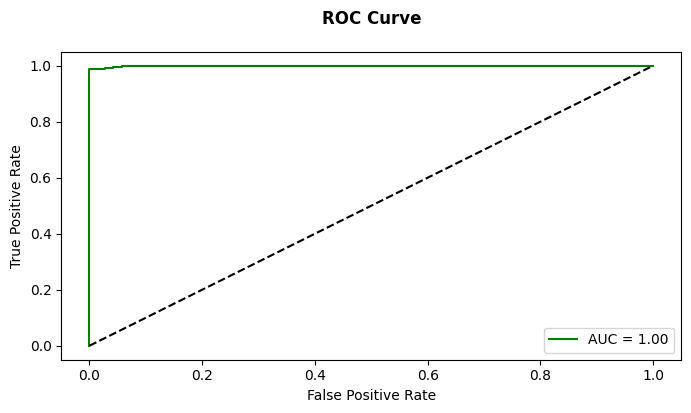

[0.02677745 0.02815596 0.03457623 0.03702511 0.05512468 0.03334117
 0.03512501 0.04818757 0.03125726 0.02581092 0.0319146  0.0388218
 0.02785344 0.02578092 0.03900821 0.02602285 0.04871041 0.02838746
 0.02706726 0.03155453 0.0932577  0.01371556 0.02024785 0.02060399
 0.05947807 0.11219407]


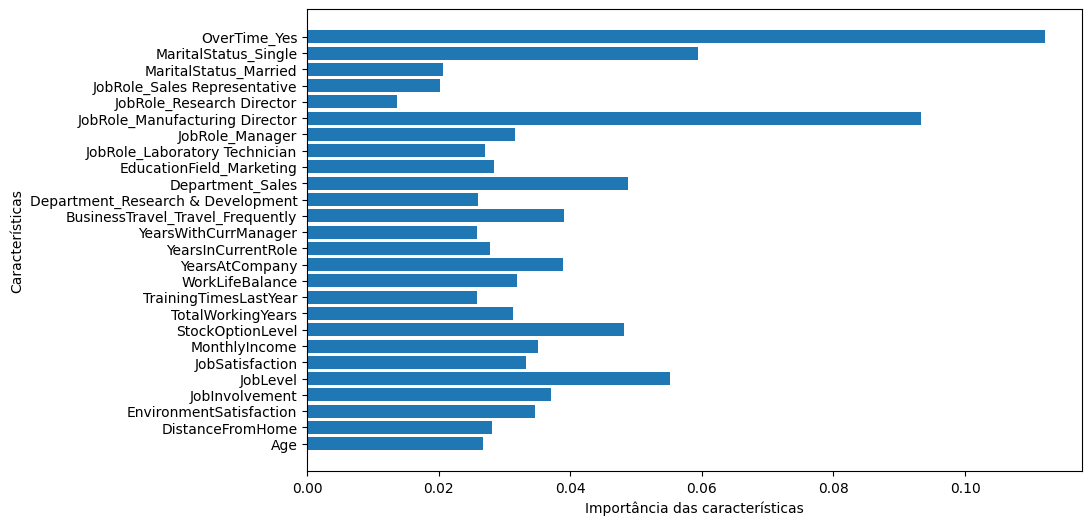

In [41]:


c=XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42)
resultados_modelo['XGBClassifier(with SMOTE)'] = model_prediction(c, X_train_smote, X_test_smote, y_train_smote, y_test_smote)
#accuracy, recall, precision, auc




importances = b.feature_importances_
print(importances)
import matplotlib.pyplot as plt

# Visualizar importâncias das características
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), selected_features)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.show()





In [42]:
y_test_pred = c.predict(X_test_smote)
y_test_prob = c.predict_proba(X_test_smote)[:, 1]
y_test_prob = np.round(y_test_prob, 2)
#transformar em pandas data frame test_indices
test_indices = pd.DataFrame(test_indices, columns=['index'])
#transformar y_test_pred em pandas
y_test_pred = pd.DataFrame(y_test_pred)
y_test_prob=pd.DataFrame(y_test_prob)
y_test_smote=pd.DataFrame(y_test_smote)


y_test_pred.index= test_indices['index'].values+1
y_test_prob.index= test_indices['index'].values+1
y_test_smote.index = test_indices['index'].values+1

mask_pred = y_test_pred.index.isin(all_indices.values)
mask_prob = y_test_prob.index.isin(all_indices.values)
mask_smote = y_test_smote.index.isin(all_indices.values)

# Use a máscara para filtrar y_test_pred, y_test_prob e y_test_smote
filtered_y_test_pred = y_test_pred[mask_pred]
filtered_y_test_prob = y_test_prob[mask_prob]
filtered_y_test_smote = y_test_smote[mask_smote]


# Crie o DataFrame
dados_xgb = pd.DataFrame({
    'Colaborador': filtered_y_test_pred.index,
    'Valor Real': filtered_y_test_smote.values.ravel(),
    'Valor Previsto': filtered_y_test_pred.values.ravel(),
    'Probabilidade': filtered_y_test_prob.values.ravel()
})
# Defina a coluna 'Colaborador' como o novo índice
dados_xgb.set_index('Colaborador', inplace=True)

Epoch 1/75
276/276 [==============================] - 2s 3ms/step - loss: 0.3723 - accuracy: 0.8580 - val_loss: 0.2998 - val_accuracy: 0.8830
Epoch 2/75
276/276 [==============================] - 1s 2ms/step - loss: 0.3117 - accuracy: 0.8803 - val_loss: 0.2887 - val_accuracy: 0.8925
Epoch 3/75
276/276 [==============================] - 1s 2ms/step - loss: 0.2856 - accuracy: 0.8916 - val_loss: 0.2929 - val_accuracy: 0.8816
Epoch 4/75
276/276 [==============================] - 1s 2ms/step - loss: 0.2569 - accuracy: 0.8975 - val_loss: 0.2682 - val_accuracy: 0.8993
Epoch 5/75
276/276 [==============================] - 1s 2ms/step - loss: 0.2341 - accuracy: 0.8989 - val_loss: 0.2580 - val_accuracy: 0.9143
Epoch 6/75
276/276 [==============================] - 1s 2ms/step - loss: 0.2060 - accuracy: 0.9088 - val_loss: 0.2542 - val_accuracy: 0.9007
Epoch 7/75
276/276 [==============================] - 1s 2ms/step - loss: 0.1890 - accuracy: 0.9302 - val_loss: 0.2135 - val_accuracy: 0.9224
Epoch 

<Axes: >

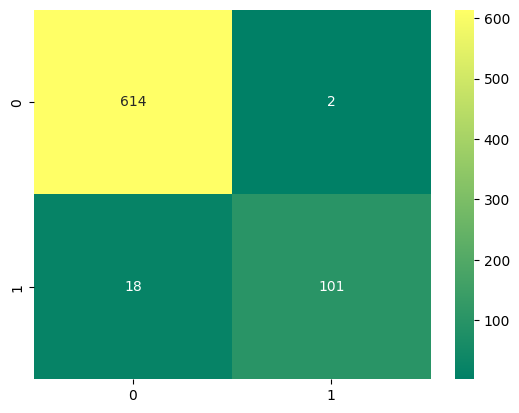

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from numpy.random import seed
#import adam
from tensorflow.keras.optimizers import Adam



# Define the neural network architecture
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_selected.shape[1],)),  
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.005), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_selected, y_train, epochs=75, batch_size=8, validation_data=(X_test_selected ,y_test),callbacks=[tf.keras.callbacks.EarlyStopping(patience=15)])

# Evaluate the model
loss, accuracy1 = model.evaluate(X_test_selected, y_test)

# Make predictions on test data
y_pred = model.predict(X_test_selected)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display confusion matrix heatmap using seaborn
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
import random
from keras.optimizers import Adam

# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),  
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
# Compile the model with optimizer, loss function, and metrics
model.compile(optimizer=Adam(learning_rate=0.0002), loss='mean_squared_error', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=16, validation_data=(X_test_smote ,y_test_smote),callbacks=[tf.keras.callbacks.EarlyStopping(patience=15)])

# Evaluate the model
accuracy,recall = model.evaluate(X_test_smote, y_test_smote)
print(accuracy,recall)
# Make predictions on test data
y_pred = model.predict(X_test_smote)
y_pred = (y_pred > 0.5)  # Thresholding for binary classification

# Confusion matrix
cm = confusion_matrix(y_test_smote, y_pred)
sns.heatmap(cm,annot=True,fmt="g",cmap="summer")


Epoch 1/100
232/232 [==============================] - 1s 4ms/step - loss: 0.2206 - accuracy: 0.6504 - val_loss: 0.1970 - val_accuracy: 0.6910
Epoch 2/100
232/232 [==============================] - 1s 3ms/step - loss: 0.1769 - accuracy: 0.7616 - val_loss: 0.1705 - val_accuracy: 0.7470
Epoch 3/100
232/232 [==============================] - 1s 2ms/step - loss: 0.1551 - accuracy: 0.7924 - val_loss: 0.1568 - val_accuracy: 0.7680
Epoch 4/100
232/232 [==============================] - 1s 3ms/step - loss: 0.1425 - accuracy: 0.8045 - val_loss: 0.1478 - val_accuracy: 0.7875
Epoch 5/100
232/232 [==============================] - 1s 2ms/step - loss: 0.1339 - accuracy: 0.8143 - val_loss: 0.1423 - val_accuracy: 0.7899
Epoch 6/100
232/232 [==============================] - 1s 3ms/step - loss: 0.1271 - accuracy: 0.8237 - val_loss: 0.1359 - val_accuracy: 0.8094
Epoch 7/100
232/232 [==============================] - 1s 3ms/step - loss: 0.1211 - accuracy: 0.8362 - val_loss: 0.1318 - val_accuracy: 0.8151

KeyboardInterrupt: 

In [ ]:
#regressão linear
from sklearn.linear_model import LinearRegression
#retirar os coeficientes da Regrtesão Linear
model = LinearRegression()
model.fit(X_train_selected, y_train)
importances = model.coef_
#mostrar importancia das características
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances, align='center')
plt.yticks(range(len(importances)), selected_features)
plt.xlabel('Importância das características')
plt.ylabel('Características')
plt.show()


In [ ]:
a=LGBMClassifier(random_state=42, learning_rate=0.1,min_child_weight=0.005)
resultados_modelo['LGBMClassifier()'] = model_prediction(LGBMClassifier(random_state=42, learning_rate=0.1,min_child_weight=0.005),X_train_smote,X_test_smote,y_train_smote,y_test_smote)


In [45]:
# Exemplo de como usar a função e armazenar os resultados


#transformar pandas dataframe invertida
df_resultados = pd.DataFrame(resultados_modelo).T
#ordenar por melhor valor de recall e 3 casas decimais
df_resultados = df_resultados.round(3)
df_resultados




,Accuracy_Train,Recall_Train,Accuracy_Test,Precision_Test,Recall_Test,F1-Score,AUC_Test
DecisionTree(without SMOTE),100.0,100.0,95.102,0.874,0.815,0.843,0.896
RandomForest(without SMOTE),100.0,100.0,95.646,0.978,0.748,0.848,0.985
XGBClassifier (without SMOTE),100.0,100.0,95.918,0.941,0.798,0.864,0.979
DecisionTree(with SMOTE),100.0,100.0,95.377,0.939,0.968,0.953,0.954
RandomForest(with SMOTE),100.0,100.0,99.432,0.993,0.995,0.994,0.999
XGBClassifier(with SMOTE),100.0,100.0,98.540,0.980,0.990,0.985,1.000


In [ ]:
#from sklearn.feature_selection import RFE

#model=XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42)
#model.fit(X_train_smote,y_train_smote)
#selector = RFE(model, n_features_to_select=25, step=1)
#selector = selector.fit(X_smote, y_smote)
#print selected features
#selected_indices = selector.get_support(indices=True)
#selected_features = list(X.columns[selected_indices])
#X_reduced = X_smote[selected_features]
#print(len(selected_features))
#X_train_selected1, X_test_selected1, y_train_smote1, y_test_smote1 = train_test_split(X_reduced, y_smote, test_size=0.2, random_state=42)

#model_prediction(XGBClassifier(subsample= 1, reg_lambda= 0.5, n_estimators= 200, max_depth= 7, learning_rate= 0.1, gamma= 0, colsample_bytree= 0.9, alpha= 0.2,random_state=42),X_train_selected1,X_test_selected1,y_train_smote1,y_test_smote1)

In [ ]:
#exportar dados_rfc para excel
import pandas as pd

# Supondo que dados_rfc seja sua DataFrame
dados_rfc.to_excel('dados_rfc.xlsx')